#  <span style="color:red">iGraph</span>
<img src="diabetes_network.png"
     alt="Markdown Monster icon"
     style="float: right; margin-right: 100px;"
     width="50%"/>
Today we will be learning how to use iGraph for network analysis. The notebook is split into parts:

1. **Condensed iGraph tutorial**
    1. installing nessecary packages
    1. edges and verticies (nodes+connections)
    1. attributes
    1. plotting
1. **Scraping PubMed**
    1. scrape using other notebook
    1. extract verticies and edges
1. **Analysis of PubMed data**
    1. initialize graph
    1. plot graph
    1. analysis
        1. counts
        1. most import person
        1. density distribution
        1. edge betweenness

## 1. Condensed toturial
Source (main): https://igraph.org/python/doc/tutorial/tutorial.html

### A. installing nessecary packages

In [28]:
from igraph import *
import matplotlib.pyplot as plt
#import pycairo
import pandas as pd
import seaborn as sns
import numpy as np

### B. edges and verticies (nodes+connections)

In [29]:
g = Graph()  # initialize a graph object
g.add_vertices(3)  # add some nodes
g.add_edges([(0,1), (1,2)])  # add edges

summary(g)

IGRAPH U--- 3 2 -- 


### C. attributes

In [30]:
g = Graph([(0,1), (0,2), (2,3), (3,4), (4,2), (2,5), (5,0), (6,3), (5,6)])
g.vs["name"] = ["Alice", "Bob", "Claire", "Dennis", "Esther", "Frank", "George"]
g.vs["age"] = [25, 31, 18, 47, 22, 23, 50]
g.vs["gender"] = ["f", "m", "f", "m", "f", "m", "m"]
g.es["is_formal"] = [False, False, True, True, True, False, True, False, False]

g.vs.select(_degree=g.maxdegree())["name"]

['Claire']

### D. Visualizing

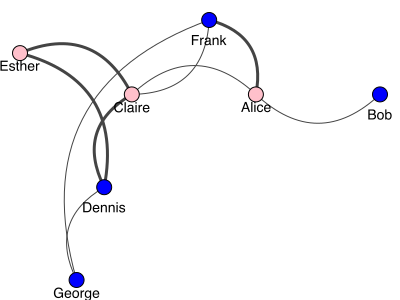

In [31]:

color_dict = {"m": "blue", "f": "pink"}

visual_style = {
        # For list of attributes see: https://igraph.org/python/doc/tutorial/tutorial.html#vertex-attributes-controlling-graph-plots
        "vertex_size" : 15,
        "vertex_color" : [color_dict[gender] for gender in g.vs["gender"]],
        "vertex_label" : g.vs["name"],
        "edge_width" : [1 + 2 * int(is_formal) for is_formal in g.es["is_formal"]],
        "layout" : g.layout_reingold_tilford_circular(root=[2]),
        "bbox" : (400, 300),
        "margin" : 20,
        "edge_curved" : 0.62,
        "vertex_label_dist" : (1,2)
    }


#plot(g, **visual_style)  # To view
plot(g, "social_network.png", **visual_style)  # To save

## 2. Scraping PubMed
Source (main): https://github.com/wdlv/PubMed

### A. installing nessecary packages

### B. Scrape

In [5]:
# Please see Scrape_PubMed.ipynb

### C. get nodes and edges

In [6]:
df = pd.read_csv('Diabetes_100.csv', index_col=0)
df.head(3)

,authors,ArticleTitle,journal_title,volume,date,pubmed,doi_pii_str,abstract
0,"C. Palumbo, N. Nicolaci, AA. La Manna, N. Bran...","""Association between central diabetes insipidu...",Medicina,78(2),(2018).,PUBMED: 29659364;,NaN,Central diabetes insipidus is a rare disease o...
1,"S. Tanaka, T. Hirabayashi, M. Kimoto, M. Hama,...","""Gefitinib Treatment Was Unsuccessful for Cent...","Internal medicine (Tokyo, Japan)",60(7),(Apr. 2021).,PUBMED: 33162476;,DOI 10.2169/internalmedicine.5643-20.,We herein report a rare case of advanced lung ...
2,"V. Kothari, Z. Cardona and Y. Eisenberg,","""Adipsic diabetes insipidus."",",Handbook of clinical neurology,181,(2021).,PUBMED: 34238462;,DOI 10.1016/B978-0-12-820683-6.00019-1.,Adipsic diabetes insipidus (ADI) is a rare but...


In [7]:
data = {}
for i in df['authors']:
    authors = i.replace(' and ', ', ').split(', ')[:-1]
    for author in authors:
        if author in data.keys():
            for j in authors:
                if j == author:
                    pass
                else:
                    if j in data[author].keys():
                        data[author][j] +=1
                    else:
                        data[author][j] =1
        else:
            data[author] = {}
            for j in authors:
                if j == author:
                    pass
                else:
                    data[author][j] =1
#data

In [72]:
[title*count for title, count in zip((list(df['ArticleTitle'].values)),list(df['authors'].apply(lambda x : len(x.split(', ')[:-1])).values))]

['"Association between central diabetes insipidus and type 2 diabetes mellitus.", "Association between central diabetes insipidus and type 2 diabetes mellitus.", "Association between central diabetes insipidus and type 2 diabetes mellitus.", "Association between central diabetes insipidus and type 2 diabetes mellitus.", ',
 '"Gefitinib Treatment Was Unsuccessful for Central Diabetes Insipidus Due to Pituitary Metastasis of Lung Adenocarcinoma.", "Gefitinib Treatment Was Unsuccessful for Central Diabetes Insipidus Due to Pituitary Metastasis of Lung Adenocarcinoma.", "Gefitinib Treatment Was Unsuccessful for Central Diabetes Insipidus Due to Pituitary Metastasis of Lung Adenocarcinoma.", "Gefitinib Treatment Was Unsuccessful for Central Diabetes Insipidus Due to Pituitary Metastasis of Lung Adenocarcinoma.", "Gefitinib Treatment Was Unsuccessful for Central Diabetes Insipidus Due to Pituitary Metastasis of Lung Adenocarcinoma.", ',
 '"Adipsic diabetes insipidus.", "Adipsic diabetes insi

## 3. Network Analysis
Source (main): https://stackoverflow.com/questions/5531433/how-to-create-an-igraph-object-from-a-dictionary-in-python

### A. Initialize graph

In [33]:
mvi = dict(zip(data.keys(),range(len(data.keys()))))
graph= Graph(edges= [(mvi[v], mvi[a]) for v in data.keys() for a in data[v].keys()])


In [34]:
### Attributes

In [37]:
graph.vs["name"] = [v for v in data.keys()]
graph.vs["number of connections"] = [len(data[v].keys()) for v in data.keys()]

In [78]:
graph.es["number of connections"] = [data[v][k] for v in data.keys() for k in data[v].keys()]
graph.es['article name']= np.array([title*count for title, count in zip((list(df['ArticleTitle'].values)),list(df['authors'].apply(lambda x : len(x.split(', ')[:-1])).values))]).flatten()

### B. Plot graph

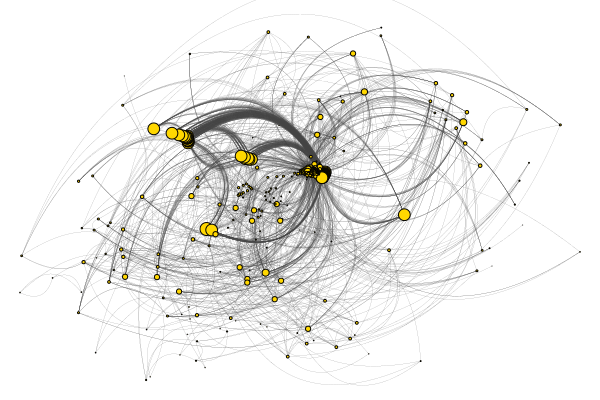

In [75]:
visual_style = {
        # For list of attributes see: https://igraph.org/python/doc/tutorial/tutorial.html#vertex-attributes-controlling-graph-plots
        "vertex_size" : np.array(graph.vs["number of connections"])/4,
        "vertex_color" : 'gold',
        "edge_width" : np.array(graph.es["number of connections"])/16,
        "layout" : graph.layout("kamada_kawai"),
        "bbox" : (600, 400),
        "margin" : 20,
        "edge_curved" : 0.8
    }

plot(graph, "diabetes_network.png", **visual_style)  # To save

In [81]:
graph.es[0]['article name']

'"Association between central diabetes insipidus and type 2 diabetes mellitus.", "Association between central diabetes insipidus and type 2 diabetes mellitus.", "Association between central diabetes insipidus and type 2 diabetes mellitus.", "Association between central diabetes insipidus and type 2 diabetes mellitus.", '

### C. Analysis

#### a. counts

In [11]:
num_verts = len(graph.vs[:]) # node count
num_edges = len(graph.es[:])  # connection count
print('# of verticies: {}\n# of edges: {}'.format(num_verts, num_edges))

# of verticies: 508
# of edges: 5884


#### b. Most important person

In [12]:
g.vs.select(_degree=g.maxdegree())["name"]

['AA. La Manna']

#### c. adjency matrix

<AxesSubplot:>

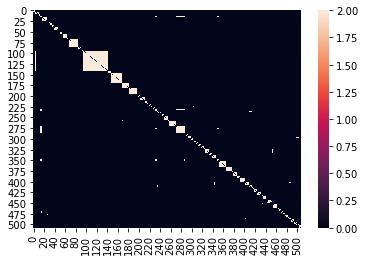

In [13]:
adjacency_matrix = graph.get_adjacency()
M = np.array([[j for j in i ]for i in adjacency_matrix])
sns.heatmap(M)

#### d. density distribution

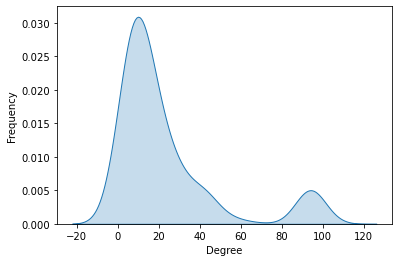

In [40]:
sns.kdeplot(graph.degree(), shade=True, )  # degree distribution
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.show()

In [42]:
min(graph.degree())

0

#### d. edge betweenness

In [19]:
# Edge betweenness
ebs = graph.edge_betweenness()
max_eb = max(ebs)
[graph.es[idx].tuple for idx, eb in enumerate(ebs) if eb == max_eb]

[(16, 243), (16, 243)]

**e.Eigenvector centrality**


In [49]:
graph.evcent()

[4.796140718786325e-17,
 2.3980703593931626e-17,
 3.597105539089744e-17,
 5.995175898482906e-17,
 3.597105539089744e-17,
 1.0,
 0.023254500829849582,
 0.023254500829849582,
 0.02325450082984962,
 0.023254500829849596,
 0.023254500829849523,
 3.597105539089744e-17,
 2.997587949241453e-17,
 2.3980703593931626e-17,
 9.59228143757265e-17,
 1.91845628751453e-16,
 -0.0,
 4.796140718786325e-17,
 7.194211078179487e-17,
 2.3980703593931626e-17,
 2.3980703593931626e-17,
 -0.0,
 4.796140718786325e-17,
 7.194211078179487e-17,
 2.3980703593931626e-17,
 9.59228143757265e-17,
 2.3980703593931626e-17,
 2.997587949241453e-17,
 1.798552769544872e-17,
 2.3980703593931626e-17,
 1.798552769544872e-17,
 3.597105539089744e-17,
 2.997587949241453e-17,
 4.796140718786325e-17,
 2.997587949241453e-17,
 4.1966231289380345e-17,
 8.393246257876069e-17,
 7.194211078179487e-17,
 5.995175898482906e-17,
 5.995175898482906e-17,
 4.796140718786325e-17,
 2.3980703593931626e-17,
 7.194211078179487e-17,
 8.393246257876069e-

In [51]:
df_less_data = df.drop(columns=['date'])

In [55]:
from sklearn.clustering import KMeans

alg = KMeans().fit(df_less_data)

alg.labels_


ModuleNotFoundError: No module named 'sklearn.clustering'

In [56]:
df['date']

0          (2018). 
1     (Apr. 2021). 
2          (2021). 
3     (Sep. 2020). 
4     (Dec. 2020). 
          ...      
95    (Sep. 2021). 
96    (Aug. 2021). 
97    (Apr. 2020). 
98    (Nov. 2018). 
99    (Jul. 2017). 
Name: date, Length: 100, dtype: object